In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("csvs/merged-df.csv")

In [35]:
sch_indep = ["grade9", "only_hs"]
per_indep = ["ell_percent", "sped_percent","asian_per",
             "black_per", "hispanic_per"]#,"white_per"]
num_indep = ["ell_num", "sped_num", "asian_num",
             "black_num","hispanic_num", "white_num"]
num_inv=[]
per_sqr=[]
for coln in num_indep:
    num_inv.append("inv"+coln)
    df["inv"+coln] = 1/(df[coln]+1)

for colp in per_indep:
    df[colp]=df[colp]/100
    df["sqr"+colp]=df[colp]**2
    per_sqr.append("sqr"+colp)

In [36]:
display(df.shape)
df["grad_per"]=df["Toal Grads #"]/df["grade9"]*100
awkdf = df[df["grad_per"]>=100]
df=df[df["grad_per"]<=100]
display(df.shape)

(2566, 61)

(2566, 61)

In [37]:
awkdf.describe()

,Unnamed: 0,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high,total_students,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,invell_num,invsped_num,invasian_num,invblack_num,invhispanic_num,invwhite_num,grad_per,sqrell_percent,sqrsped_percent,sqrasian_per,sqrblack_per,sqrhispanic_per
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,1589.857143,2008.428571,119.714286,108.000000,87.728571,28.000000,19.371429,432.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.428571,33.428571,21.000000,108.000000,89.000000,76.571429,68.857143,6.857143,0.000636,13.000000,0.000401,92.000000,0.001161,148.285714,0.004481,60.571429,0.002484,125.857143,17.042857,210.857143,47.042857,221.428571,52.957143,0.428571,432.285714,0.0,0.0,0.0,0.0,89.857143,0.571429,0.428571,0.447186,0.156629,0.229568,0.020831,0.029030,0.202656,100.0,1.590386e-06,2.824429e-07,3.292157e-06,2.867661e-05,1.084944e-05
std,911.896088,1.618347,80.086858,87.336514,24.530166,31.118912,27.321891,366.712292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.256016,43.158070,36.828431,87.336514,99.949987,80.537480,77.320607,11.509830,0.001176,13.178265,0.000376,138.479842,0.001506,164.192686,0.003166,38.604219,0.002336,241.183491,26.233684,194.680446,6.528618,184.056927,6.528618,0.534522,366.712292,0.0,0.0,0.0,0.0,121.963695,0.534522,0.534522,0.405399,0.167116,0.254156,0.021104,0.032095,0.216943,0.0,3.903844e-06,4.183393e-07,5.449896e-06,3.139617e-05,1.613164e-05
min,157.000000,2007.000000,65.000000,31.000000,32.300000,0.000000,0.000000,72.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000110,1.000000,0.000080,17.000000,0.000170,9.000000,0.000510,1.000000,0.800000,29.000000,38.100000,43.000000,43.200000,0.000000,72.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.030303,0.023810,0.003311,0.002398,0.008065,0.001543,100.0,0.000000e+00,1.210000e-08,6.400000e-09,2.890000e-08,2.601000e-07
25%,1058.500000,2007.000000,72.000000,65.000000,94.550000,0.000000,0.000000,112.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,65.000000,25.500000,17.500000,4.000000,0.500000,0.000005,6.500000,0.000155,1.000000,0.000120,39.500000,0.002485,39.500000,0.000795,2.500000,1.200000,52.500000,42.900000,59.500000,49.700000,0.000000,112.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.175000,0.074176,0.013370,0.006915,0.012794,0.025190,100.0,5.000000e-11,2.425000e-08,1.480000e-08,6.364450e-06,6.452500e-07
50%,1811.000000,2008.000000,96.000000,72.000000,96.900000,13.400000,0.000000,439.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,72.000000,61.000000,57.000000,57.000000,3.000000,0.000070,11.000000,0.000200,12.000000,0.000250,85.000000,0.004480,52.000000,0.001570,5.000000,2.700000,231.000000,48.000000,208.000000,52.000000,0.000000,439.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.250000,0.083333,0.076923,0.011628,0.018868,0.166667,100.0,4.900000e-09,4.000000e-08,6.250000e-08,2.007040e-05,2.464900e-06
75%,2176.000000,2009.500000,120.000000,115.000000,97.900000,60.000000,37.800000,635.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.000000,67.500000,29.500000,115.000000,110.500000,109.000000,103.000000,6.000000,0.000570,12.500000,0.000615,164.000000,0.001955,220

In [34]:
df.describe()

,Unnamed: 0,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high,total_students,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,invell_num,invsped_num,invasian_num,invblack_num,invhispanic_num,invwhite_num,grad_per
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.00000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,1381.466875,2008.164848,188.222136,144.673422,77.901832,33.212646,33.174591,827.199922,0.019486,0.469213,0.464926,0.467264,0.439205,0.455183,0.423227,11.775526,13.921668,13.787607,262.501559,226.705378,157.121200,138.64809,88.424006,0.116069,96.574435,0.125314,120.169525,0.083484,272.538581,0.391795,317.051832,0.431856,104.917381,7.676734,416.966485,49.051676,410.233048,50.948636,0.195635,827.199532,2.249805,0.488698,0.006235,0.010912,39.484801,0.799688,0.212783,0.099689,0.058647,0.150065,0.020529,0.009278,0.169721,59.468728
std,782.266301,1.983093,221.476236,180.329874,15.075954,34.141560,37.332212,941.381390,0.575330,6.490571,6.408703,6.399645,6.063665,6.198231,5.855984,31.013213,33.945842,34.222294,313.247771,279.250376,201.734894,191.54543,159.025657,0.177103,110.749858,0.065688,323.447059,0.126605,329.817759,0.247715,376.472404,0.234227,292.041064,12.987077,504.214534,13.300857,465.780599,13.300765,0.396766,941.381317,30.481918,6.556671,0.078733,0.103909,96.341633,0.400312,0.451042,0.193947,0.156775,0.218853,0.097587,0.012898,0.225153,20.218033
min,0.000000,2005.000000,6.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.024000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000705,0.001330,0.000311,0.000260,0.000344,0.000314,0.000000
25%,712.250000,2006.000000,82.000000,60.000000,69.100000,0.000000,0.000000,338.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,88.000000,61.000000,43.00000,11.000000,0.026000,30.000000,0.084000,4.000000,0.012000,93.000000,0.217250,98.000000,0.210000,3.000000,0.900000,154.000000,43.700000,166.000000,45.600000,0.000000,338.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.013333,0.009639,0.016462,0.002994,0.002894,0.020408,45.981673
50%,1376.500000,2008.000000,102.000000,78.000000,79.000000,23.950000,0.000000,450.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,117.000000,88.000000,77.00000,30.000000,0.061000,62.000000,0.128000,13.000000,0.027000,161.000000,0.340000,209.000000,0.464000,9.000000,2.000000,221.000000,49.200000,239.000000,50.800000,0.000000,450.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.032258,0.015873,0.071429,0.006173,0.004762,0.100000,58.686669
75%,2054.750000,2010.000000,155.750000,122.000000,89.600000,67.100000,73.600000,755.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.00

In [38]:
independents = per_indep+per_sqr#+sch_indep+num_inv
x_mega_train, x_holdout, y_mega_train, y_holdout = train_test_split(
                                                    df[independents],
                                                    df["grad_per"],
                                                    test_size=0.1)
x_train, x_test, y_train, y_test = train_test_split(x_mega_train,
                                                    y_mega_train,
                                                    test_size=0.2)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(x_train)

#transform the x data
x_train_s = pd.DataFrame(data=scaler.transform(x_train), columns=x_train.columns)
x_test_s = pd.DataFrame(data=scaler.transform(x_test), columns=x_test.columns)


In [43]:
lm_grad = LinearRegression()

lm_grad.fit(x_train_s,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
basic_y_prediction = lm_grad.predict(x_test_s)
basic_y_prediction = list(map(lambda x: x if x<100 else 100, basic_y_prediction))
basic_rmse = np.sqrt(metrics.mean_squared_error(y_test, basic_y_prediction))
print("basic rmse", basic_rmse)

basic rmse 15.91301971222551


In [52]:
#basic_y_prediction = lm_grad.predict(x_test_s)
#basic_y_prediction = list(map(lambda x: x if x<100 else 100, basic_y_prediction))
x_test["null"] = y_train.mean()
basic_rmse = np.sqrt(metrics.mean_squared_error(y_test, x_test["null"]))
print("basic rmse", basic_rmse)

basic rmse 20.094641456077156


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
display(basic_y_prediction)

[52.95970737024554,
 50.687351506692025,
 93.1472672404474,
 81.36130439576304,
 38.487168416036255,
 62.12052116110144,
 75.2579832384691,
 51.06191064271224,
 47.263612562677395,
 51.35071930918937,
 51.26294805103893,
 57.924058894523775,
 48.26718734271624,
 69.9892402182033,
 60.35359283127832,
 61.69662939002801,
 58.89671026273379,
 47.430114066106995,
 65.22778792535824,
 48.3281449774676,
 93.89634740843512,
 42.42254631993673,
 47.75535725375234,
 100,
 48.814548531168526,
 68.83690342390345,
 48.54931556946101,
 54.26702240763037,
 43.27979301898867,
 67.40724396939126,
 66.90808666490547,
 56.61310471001789,
 49.162163917543054,
 57.56132148752861,
 62.4846390712368,
 65.54599932931347,
 55.086940341133214,
 54.949904858945416,
 66.80126751541489,
 79.41925167840861,
 78.17931727088265,
 51.99621820006045,
 87.29637349305136,
 49.496886825254876,
 65.77128599120255,
 54.60807728178222,
 46.99466174803316,
 55.100862267421185,
 54.937384645667485,
 54.45172555604766,
 52.465

In [53]:
lm_grad.coef_

array([-18.60544875, -10.74987789,  -0.81639792, -15.44198412,
        -8.82479073,  13.2246412 ,   5.24319533,   0.91710075,
         7.43709905,   5.58170665])

In [54]:
df[independents].describe()

,ell_percent,sped_percent,asian_per,black_per,hispanic_per,sqrell_percent,sqrsped_percent,sqrasian_per,sqrblack_per,sqrhispanic_per
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03,2.566000e+03,2.566000e+03,2566.000000,2.566000e+03
mean,0.001161,0.001253,0.000835,0.003918,0.004319,4.482534e-06,2.001690e-06,2.299212e-06,0.000021,2.413405e-05
std,0.001771,0.000657,0.001266,0.002477,0.002342,1.495306e-05,1.827723e-06,6.820876e-06,0.000024,2.144459e-05
min,0.000000,0.000000,0.000000,0.000000,0.000240,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.760000e-08
25%,0.000260,0.000840,0.000120,0.002172,0.002100,6.760000e-08,7.056000e-07,1.440000e-08,0.000005,4.410000e-06
50%,0.000610,0.001280,0.000270,0.003400,0.004640,3.721000e-07,1.638400e-06,7.290000e-08,0.000012,2.152960e-05
75%,0.001250,0.001690,0.000900,0.005358,0.006140,1.562500e-06,2.856100e-06,8.100000e-07,0.000029,3.769960e-05
max,0.010000,0.004580,0.008990,0.009650,0.010000,1.000000e-04,2.097640e-05,8.082010e-05,0.000093,1.000000e-04


In [55]:
from statsmodels.formula.api import ols
colnames = "+".join(filter(lambda x: x not in ["grad_per",
                                               #"lat","long"
                                              ], x_train_s.columns))

full_train=pd.concat([y_train,x_train_s],axis=1).rename({0:"grad_per"},axis=1)
olsstr = "grad_per~"+colnames
lr_model = ols(formula=olsstr, data=full_train).fit()
#full_train

lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               grad_per   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.279
Date:                Sun, 13 Sep 2020   Prob (F-statistic):              0.237
Time:                        14:02:24   Log-Likelihood:                -5397.0
No. Observations:                1224   AIC:                         1.082e+04
Df Residuals:                    1213   BIC:                         1.087e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          57.5240      0.573    100.400      0.000      56.400      58.648
ell_percent        -2.6174      2.339     -1.119      0.263      -7.206       1.971
sped_percent       -2.0031      2.131     -0.940      0.347      -6.184       2.177
asian_per           1.6924      2.108      0.803      0.422      -2.444       5.828
black_per           2.7266      3.659      0.745      0.456      -4.452       9.905
hispanic_per        6.5821      3.734      1.763      0.078      -0.744      13.908
sqrell_percent      2.0156      2.258      0.892      0.372      -2.415       6.446
sqrsped_percent     1.4155      1.994      0.710      0.478      -2.497       5.328
sqrasian_per        0.3224      1.498      0.215      0.830      -2.616       3.260
sqrblack_per        0.5965      3.742      0.159      0.873      -6.746       7.939
sqrhispanic_per    -4.1645      3.434     -1.213      0.225     -10.902       2.573
==============================================================================
Omnibus:                       12.970   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.840
Skew:                          -0.060   Prob(JB):                       0.0120
Kurtosis:                       2.602   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
viffactor = [variance_inflation_factor(x_train_s.values, i) for i in range(x_train_s.shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = viffactor
#[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = x_train_s.columns
vif=vif.round(1).sort_values("VIF Factor",ascending=False)
vif

,VIF Factor,features
4,44.2,hispanic_per
8,43.0,sqrblack_per
3,41.4,black_per
9,37.1,sqrhispanic_per
0,17.0,ell_percent
5,16.5,sqrell_percent
2,14.2,asian_per
1,11.5,sped_percent
6,9.2,sqrsped_percent
7,7.7,sqrasian_per


In [15]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(x_train)
poly2_columns = poly_2.get_feature_names(x_train.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()


,ell_percent,sped_percent,asian_per,black_per,hispanic_per,grade9,only_hs,invell_num,invsped_num,invasian_num,invblack_num,invhispanic_num,invwhite_num,ell_percent^2,ell_percent sped_percent,ell_percent asian_per,ell_percent black_per,ell_percent hispanic_per,ell_percent grade9,ell_percent only_hs,ell_percent invell_num,ell_percent invsped_num,ell_percent invasian_num,ell_percent invblack_num,ell_percent invhispanic_num,ell_percent invwhite_num,sped_percent^2,sped_percent asian_per,sped_percent black_per,sped_percent hispanic_per,sped_percent grade9,sped_percent only_hs,sped_percent invell_num,sped_percent invsped_num,sped_percent invasian_num,sped_percent invblack_num,sped_percent invhispanic_num,sped_percent invwhite_num,asian_per^2,asian_per black_per,asian_per hispanic_per,asian_per grade9,asian_per only_hs,asian_per invell_num,asian_per invsped_num,asian_per invasian_num,asian_per invblack_num,asian_per invhispanic_num,asian_per invwhite_num,black_per^2,black_per hispanic_per,black_per grade9,black_per only_hs,black_per invell_num,black_per invsped_num,black_per invasian_num,black_per invblack_num,black_per invhispanic_num,black_per invwhite_num,hispanic_per^2,hispanic_per grade9,hispanic_per only_hs,hispanic_per invell_num,hispanic_per invsped_num,hispanic_per invasian_num,hispanic_per invblack_num,hispanic_per invhispanic_num,hispanic_per invwhite_num,grade9^2,grade9 only_hs,grade9 invell_num,grade9 invsped_num,grade9 invasian_num,grade9 invblack_num,grade9 invhispanic_num,grade9 invwhite_num,only_hs^2,only_hs invell_num,only_hs invsped_num,only_hs invasian_num,only_hs invblack_num,only_hs invhispanic_num,only_hs invwhite_num,invell_num^2,invell_num invsped_num,invell_num invasian_num,invell_num invblack_num,invell_num invhispanic_num,invell_num invwhite_num,invsped_num^2,invsped_num invasian_num,invsped_num invblack_num,invsped_num invhispanic_num,invsped_num invwhite_num,invasian_num^2,invasian_num invblack_num,invasian_num invhispanic_num,invasian_num invwhite_num,invblack_num^2,invblack_num invhispanic_num,invblack_num invwhite_num,invhispanic_num^2,invhispanic_num invwhite_num,invwhite_num^2
0,0.098,0.140,0.012,0.395,0.572,95.0,0.0,0.023256,0.016393,0.166667,0.005848,0.004049,1.000000,0.009604,0.013720,0.001176,0.038710,0.056056,9.310,0.000,0.002279,0.001607,0.016333,0.000573,0.000397,0.098000,0.019600,0.001680,0.055300,0.080080,13.300,0.000,0.003256,0.002295,0.023333,0.000819,0.000567,0.140000,0.000144,0.004740,0.006864,1.140,0.000,0.000279,0.000197,0.002000,0.000070,0.000049,0.012000,0.156025,0.225940,37.525,0.000,0.009186,0.006475,0.065833,0.002310,0.001599,0.395000,0.327184,54.340,0.000,0.013302,0.009377,0.095333,0.003345,0.002316,0.572000,9025.0,0.0,2.209302,1.557377,15.833333,0.555556,0.384615,95.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000541,0.000381,0.003876,0.000136,0.000094,0.023256,0.000269,0.002732,0.000096,6.637021e-05,0.016393,0.027778,0.000975,0.000675,0.166667,0.000034,2.367592e-05,0.005848,1.639102e-05,0.004049,1.000000
1,0.066,0.228,0.007,0.274,0.696,140.0,1.0,0.047619,0.014286,0.333333,0.011905,0.004717,0.142857,0.004356,0.015048,0.000462,0.018084,0.045936,9.240,0.066,0.003143,0.000943,0.022000,0.000786,0.000311,0.009429,0.051984,0.001596,0.062472,0.158688,31.920,0.228,0.010857,0.003257,0.076000,0.002714,0.001075,0.032571,0.000049,0.001918,0.004872,0.980,0.007,0.000333,0.000100,0.002333,0.000083,0.000033,0.001000,0.075076,0.190704,38.360,0.274,0.013048,0.003914,0.091333,0.003262,0.001292,0.039143,0.484416,97.440,0.696,0.033143,0.009943,0.232000,0.008286,0.003283,0.099429,19600.0,140.0,6.666667,2.000000,46.666667,1.666667,0.660377,20.000000,1.0,0.047619,0.014286,0.333333,0.011905,0.004717,0.142857,0.002268,0.000680,0.015873,0.000567,0.000225,0.006803,0.000204,0.004762,0.000170,6.738544e-05,0.002041,0.111111,0.003968,0.001572,0.047619,0.000142,5.615454e-05,0.001701,2.224991e-05,0.000674,0.020408
2,0.030,0.241,0.000,0.878,0.113,83.0,0.0,0.090909,0.012195,1.000000,0.003378,

In [16]:
test_poly2_data = poly_2.fit_transform(x_test)
test_poly2_columns = poly_2.get_feature_names(x_test.columns)
test_poly2_df = pd.DataFrame(test_poly2_data, columns=test_poly2_columns)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
viffactor = [variance_inflation_factor(df_poly2.values, i) for i in range(df_poly2.shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = viffactor
#[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_poly2.columns
vif=vif.round(1).sort_values("VIF Factor",ascending=False)
vif = vif[vif["VIF Factor"]<50]
vif_features = vif["features"]
x_train_vif = df_poly2[vif_features]
vif

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
21,49.3,ell_percent invsped_num
101,45.3,invhispanic_num^2
31,44.3,sped_percent only_hs
41,44.2,asian_per grade9
30,42.0,sped_percent grade9
83,41.2,invell_num^2
87,40.5,invell_num invhispanic_num
22,40.2,ell_percent invasian_num
44,39.5,asian_per invsped_num
78,38.8,only_hs invsped_num


In [18]:
from sklearn.feature_selection import RFECV
ols = LinearRegression()

selector = RFECV(estimator=ols, min_features_to_select=5, step=1, cv=5,
                 scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
selector.fit(df_poly2, y_train)


RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=5, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=2)

In [19]:
selected_rfe = df_poly2.columns[selector.support_]
removed_rfe = df_poly2.columns[~selector.support_]

In [20]:

lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(df_poly2[selected_rfe], y_train)

y_rfe = lm_rfe.predict(test_poly2_df[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)



Training Root Mean Squared Error: 17.31941466450438


In [21]:
lm_rfe.coef_

array([-1.67116070e+02,  4.36962421e+01, -4.09219013e+01, -1.18354486e+02,
       -7.44925107e+01, -6.57978707e-02,  1.91422151e+01, -6.20784804e+00,
        1.08435131e+01, -1.68693319e+01, -3.00444062e+02, -1.47060101e+03,
        9.34647728e+00,  6.26439976e+01, -5.16451596e+01,  1.20857724e+01,
        5.60200534e+01,  4.93400667e+01, -8.08939601e-03,  4.16493038e+01,
       -1.07629508e+02,  1.47031517e+01,  3.14302156e+01, -9.81784650e+01,
        1.39289952e+03, -3.20890675e+01,  2.15853066e+01,  4.82638079e+01,
       -1.78384230e+02, -7.20095630e+01, -3.05923082e-02, -4.46676016e+01,
       -2.18150286e+02,  4.15993931e+03,  8.56932216e+01, -6.28584230e+02,
        2.14993668e+03, -5.18633082e+01,  6.33904520e+01,  8.77993677e+01,
       -2.47829347e+00,  5.66415683e-02, -2.89440849e+01, -4.59664368e+01,
        4.75946906e+01, -3.95004445e+02,  2.17537577e+02,  5.25261833e+02,
        5.98822707e+01,  9.39618957e+01,  7.79139448e+01,  3.65933250e-02,
       -4.45776636e+01,  

In [22]:
df_poly2[selected_rfe]

,ell_percent,sped_percent,asian_per,black_per,hispanic_per,grade9,only_hs,invell_num,invsped_num,invasian_num,invblack_num,invhispanic_num,invwhite_num,ell_percent^2,ell_percent sped_percent,ell_percent asian_per,ell_percent black_per,ell_percent hispanic_per,ell_percent grade9,ell_percent only_hs,ell_percent invell_num,ell_percent invsped_num,ell_percent invasian_num,ell_percent invblack_num,ell_percent invhispanic_num,ell_percent invwhite_num,sped_percent^2,sped_percent asian_per,sped_percent black_per,sped_percent hispanic_per,sped_percent grade9,sped_percent only_hs,sped_percent invell_num,sped_percent invsped_num,sped_percent invasian_num,sped_percent invblack_num,sped_percent invhispanic_num,sped_percent invwhite_num,asian_per^2,asian_per black_per,asian_per hispanic_per,asian_per grade9,asian_per only_hs,asian_per invell_num,asian_per invsped_num,asian_per invasian_num,asian_per invblack_num,asian_per invhispanic_num,asian_per invwhite_num,black_per^2,black_per hispanic_per,black_per grade9,black_per only_hs,black_per invell_num,black_per invsped_num,black_per invasian_num,black_per invblack_num,black_per invhispanic_num,black_per invwhite_num,hispanic_per^2,hispanic_per grade9,hispanic_per only_hs,hispanic_per invell_num,hispanic_per invsped_num,hispanic_per invasian_num,hispanic_per invblack_num,hispanic_per invhispanic_num,hispanic_per invwhite_num,grade9^2,grade9 only_hs,grade9 invell_num,grade9 invsped_num,grade9 invasian_num,grade9 invblack_num,grade9 invhispanic_num,grade9 invwhite_num,only_hs^2,only_hs invell_num,only_hs invsped_num,only_hs invasian_num,only_hs invblack_num,only_hs invhispanic_num,only_hs invwhite_num,invell_num^2,invell_num invsped_num,invell_num invasian_num,invell_num invblack_num,invell_num invhispanic_num,invell_num invwhite_num,invsped_num^2,invsped_num invasian_num,invsped_num invblack_num,invsped_num invhispanic_num,invsped_num invwhite_num,invasian_num^2,invasian_num invblack_num,invasian_num invhispanic_num,invasian_num invwhite_num,invblack_num^2,invblack_num invhispanic_num,invblack_num invwhite_num,invhispanic_num^2,invhispanic_num invwhite_num,invwhite_num^2
0,0.098,0.140,0.012,0.395,0.572,95.0,0.0,0.023256,0.016393,0.166667,0.005848,0.004049,1.000000,0.009604,0.013720,0.001176,0.038710,0.056056,9.310,0.000,0.002279,0.001607,0.016333,0.000573,0.000397,0.098000,0.019600,0.001680,0.055300,0.080080,13.300,0.000,0.003256,0.002295,0.023333,0.000819,0.000567,0.140000,0.000144,0.004740,0.006864,1.140,0.000,0.000279,0.000197,0.002000,0.000070,0.000049,0.012000,0.156025,0.225940,37.525,0.000,0.009186,0.006475,0.065833,0.002310,0.001599,0.395000,0.327184,54.340,0.000,0.013302,0.009377,0.095333,0.003345,0.002316,0.572000,9025.0,0.0,2.209302,1.557377,15.833333,0.555556,0.384615,95.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000541,0.000381,0.003876,0.000136,0.000094,0.023256,0.000269,0.002732,0.000096,6.637021e-05,0.016393,0.027778,0.000975,0.000675,0.166667,0.000034,2.367592e-05,0.005848,1.639102e-05,0.004049,1.000000
1,0.066,0.228,0.007,0.274,0.696,140.0,1.0,0.047619,0.014286,0.333333,0.011905,0.004717,0.142857,0.004356,0.015048,0.000462,0.018084,0.045936,9.240,0.066,0.003143,0.000943,0.022000,0.000786,0.000311,0.009429,0.051984,0.001596,0.062472,0.158688,31.920,0.228,0.010857,0.003257,0.076000,0.002714,0.001075,0.032571,0.000049,0.001918,0.004872,0.980,0.007,0.000333,0.000100,0.002333,0.000083,0.000033,0.001000,0.075076,0.190704,38.360,0.274,0.013048,0.003914,0.091333,0.003262,0.001292,0.039143,0.484416,97.440,0.696,0.033143,0.009943,0.232000,0.008286,0.003283,0.099429,19600.0,140.0,6.666667,2.000000,46.666667,1.666667,0.660377,20.000000,1.0,0.047619,0.014286,0.333333,0.011905,0.004717,0.142857,0.002268,0.000680,0.015873,0.000567,0.000225,0.006803,0.000204,0.004762,0.000170,6.738544e-05,0.002041,0.111111,0.003968,0.001572,0.047619,0.000142,5.615454e-05,0.001701,2.224991e-05,0.000674,0.020408
2,0.030,0.241,0.000,0.878,0.113,83.0,0.0,0.090909,0.012195,1.000000,0.003378,

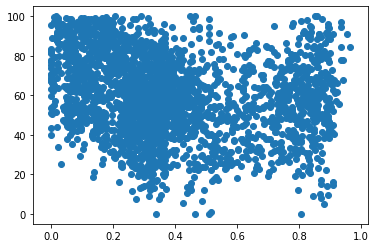

In [23]:
plt.scatter(df["black_per"],df["grad_per"])


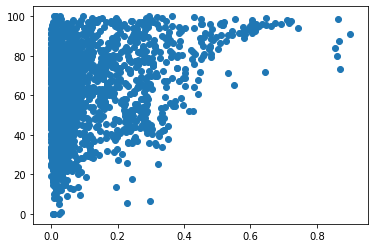

In [24]:
plt.scatter(df["asian_per"],df["grad_per"])

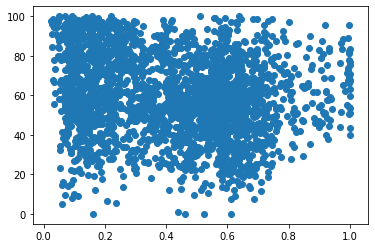

In [25]:
plt.scatter(df["hispanic_per"],df["grad_per"])

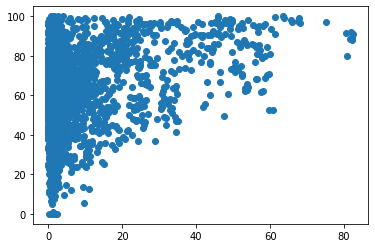

In [26]:
plt.scatter(df["white_per"],df["grad_per"])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


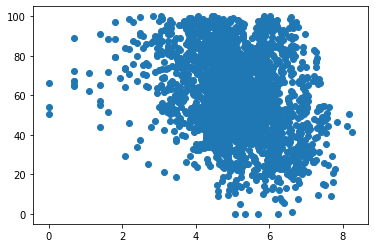

In [27]:
plt.scatter(np.log(df["black_num"]),df["grad_per"])


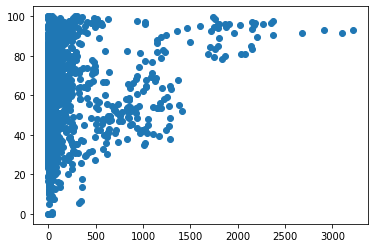

In [28]:
plt.scatter(df["asian_num"],df["grad_per"])

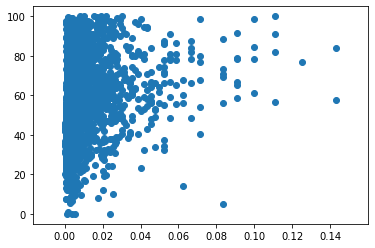

In [29]:
plt.scatter(1/df["hispanic_num"],df["grad_per"])

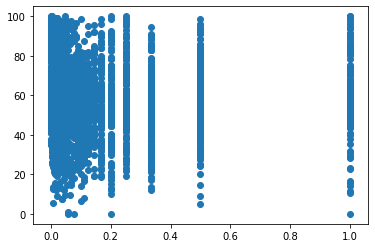

In [30]:
plt.scatter(1/df["white_num"],df["grad_per"])

In [31]:
df["white_num"].nunique()

431

In [32]:
df["black_num"].nunique()
df["hispanic_num"].nunique()

794

In [33]:
df[df["white_num"]<5]

,Unnamed: 0,DBN,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high,total_students,true,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,invell_num,invsped_num,invasian_num,invblack_num,invhispanic_num,invwhite_num,grad_per
93,93,02M303,2005,105,58,65.2,60.0,0.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,20.0,0.175,17.0,0.149,3,0.026,29,0.254,73,0.640,4,3.5,72.0,63.2,42.0,36.8,0,114.0,True,0.0,0.0,0,0,0.0,1,0,0.047619,0.055556,0.250000,0.033333,0.013514,0.200000,50.877193
97,97,02M303,2009,98,66,68.0,0.0,85.9,401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,85.0,69.0,20.0,59.0,0.147,82.0,0.204,8,0.020,125,0.312,261,0.651,3,0.7,202.0,50.4,199.0,49.6,0,401.0,True,0.0,0.0,0,0,0.0,1,0,0.016667,0.012048,0.111111,0.007937,0.003817,0.250000,29.074890
107,107,02M308,2005,67,56,86.2,60.0,0.0,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,1.0,0.012,14.0,0.169,7,0.084,39,0.470,30,0.361,3,3.6,37.0,44.6,46.0,55.4,0,83.0,True,0.0,0.0,0,0,0.0,1,0,0.500000,0.066667,0.125000,0.025000,0.032258,0.250000,67.469880
121,121,02M316,2005,77,59,81.7,60.0,0.0,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0,0.0,1.0,0.009,11.0,0.103,1,0.009,26,0.243,68,0.636,3,2.8,0.0,0.0,107.0,100.0,0,107.0,True,0.0,0.0,0,0,0.0,1,0,0.500000,0.083333,0.500000,0.037037,0.014493,0.250000,55.140187
122,122,02M316,2006,74,60,82.2,73.8,0.0,206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,93.0,0.0,0.0,8.0,0.039,17.0,0.083,7,0.034,72,0.350,111,0.539,3,1.5,0.0,0.0,206.0,100.0,0,206.0,True,0.0,0.0,0,0,0.0,1,0,0.111111,0.055556,0.125000,0.013699,0.008929,0.250000,53.097345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2731,32K556,2007,138,83,65.4,86.6,0.0,458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,121.0,82.0,81.0,108.0,0.236,53.0,0.116,6,0.013,76,0.166,373,0.814,2,0.4,192.0,41.9,266.0,58.1,0,458.0,True,0.0,0.0,0,0,0.0,1,0,0.009174,0.018519,0.142857,0.012987,0.002674,0.333333,47.701149
2732,2732,32K556,2008,110,60,56.1,86.4,0.0,489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,144.0,80.0,89.0,100.0,0.204,75.0,0.153,6,0.012,78,0.160,400,0.818,4,0.8,225.0,46.0,264.0,54.0,0,489.0,True,0.0,0.0,0,0,0.0,1,0,0.009901,0.013158,0.142857,0.012658,0.002494,0.200000,34.090909
2733,2733,32K556,2009,110,80,76.2,0.0,94.4,481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,133.0,108.0,85.0,102.0,0.212,82.0,0.170,5,0.010,81,0.168,391,0.813,2,0.4,245.0,50.9,236.0,49.1,0,481.0,True,0.0,0.0,0,0,0.0,1,0,0.009709,0.012048,0.166667,0.012195,0.002551,0.333333,51.612903
2734,2734,32K556,2010,110,82,81.2,0.0,96.7,500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,109.0,111.0,144.0,101.0,0.202,88.0,0.176,3,0.006,92,0.184,402,0.804,1,0.2,270.0,54.0,230.0,46.0,0,500.0,True,0.0,0.0,0,0,0.0,1,0,0.009804,0.011236,0.250000,0.010753,0.002481,0.500000,60.294118
